In [26]:
#Import Data Manupulation Library
import numpy as np
import pandas as pd

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

#Import Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Import Filter Warnings Library
import warnings
warnings.filterwarnings("ignore")

#Import Logging Library
import logging
logging.basicConfig(level=logging.INFO,
                    filename='model.log',
                    filemode='w',
                    format='%(levelname)s - %(message)s - %(asctime)s',force=True)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,learning_curve,KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE


# Multicolinearity test and treatment libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

In [27]:
#Import Data Using Pandas Function
# Load the Dataset

url = "https://raw.githubusercontent.com/ankitmandhare1111/Wine-quality-project-ML/refs/heads/main/winequality.csv"
df=pd.read_csv(url)
df.sample(frac=1)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4911,red,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,5
3154,white,7.2,0.400,0.38,2.2,0.030,40.0,109.0,0.99075,3.27,0.46,12.6,6
2501,white,6.4,0.310,0.40,6.4,0.039,39.0,191.0,0.99513,3.14,0.52,9.8,5
842,white,8.7,0.230,0.32,13.4,0.044,35.0,169.0,0.99975,3.12,0.47,8.8,7
5208,red,10.3,0.530,0.48,2.5,0.063,6.0,25.0,0.99980,3.12,0.59,9.3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6061,red,9.0,0.785,0.24,1.7,0.078,10.0,21.0,0.99692,3.29,0.67,10.0,5
4620,white,6.4,0.380,0.19,4.5,0.038,36.0,119.0,0.99151,3.07,0.42,11.2,6
2836,white,6.5,0.220,0.45,8.0,0.053,52.0,196.0,0.99590,3.23,0.48,9.1,6
5082,red,6.7,0.620,0.21,1.9,0.079,8.0,62.0,0.99700,3.52,0.58,9.3,6


In [28]:
# statistical info
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [29]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [30]:
# check for null values
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [31]:
# fill the missing values
for col, value in df.items():
    if col != 'type':
        df[col] = df[col].fillna(df[col].mean())

In [32]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

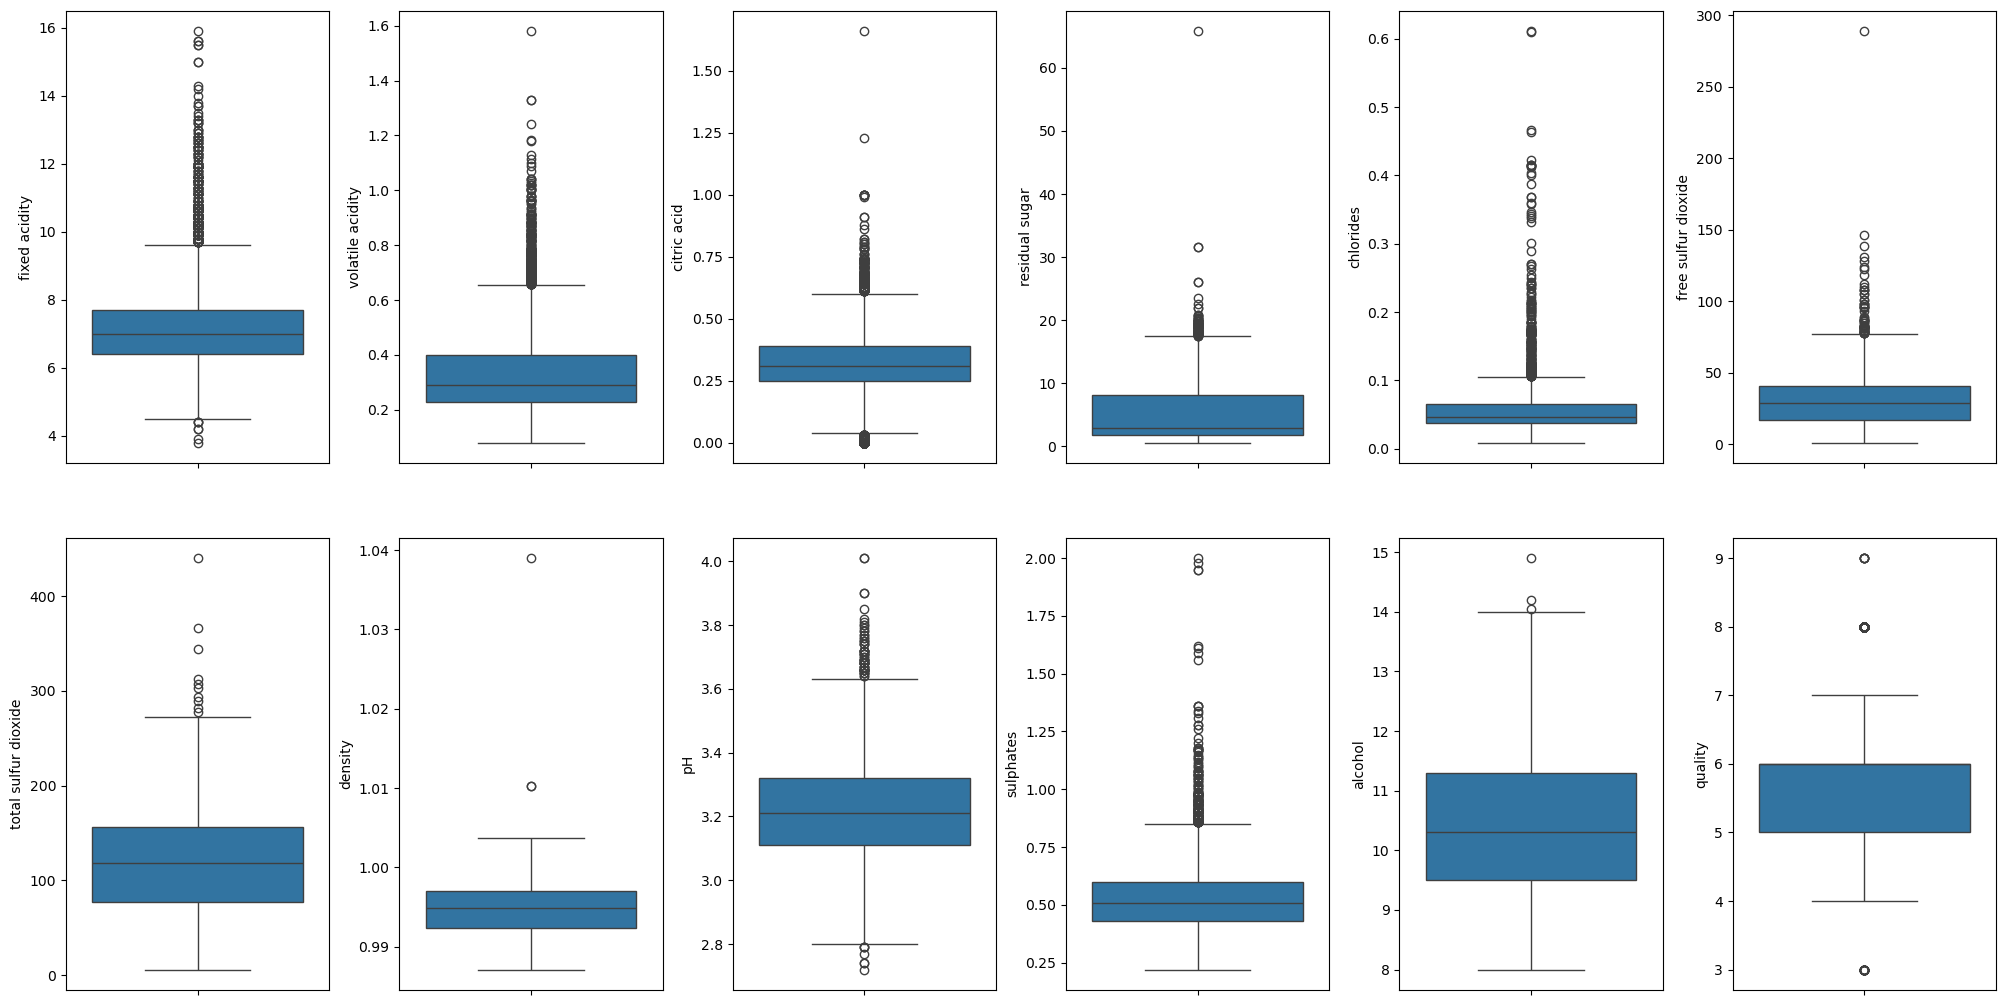

In [33]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

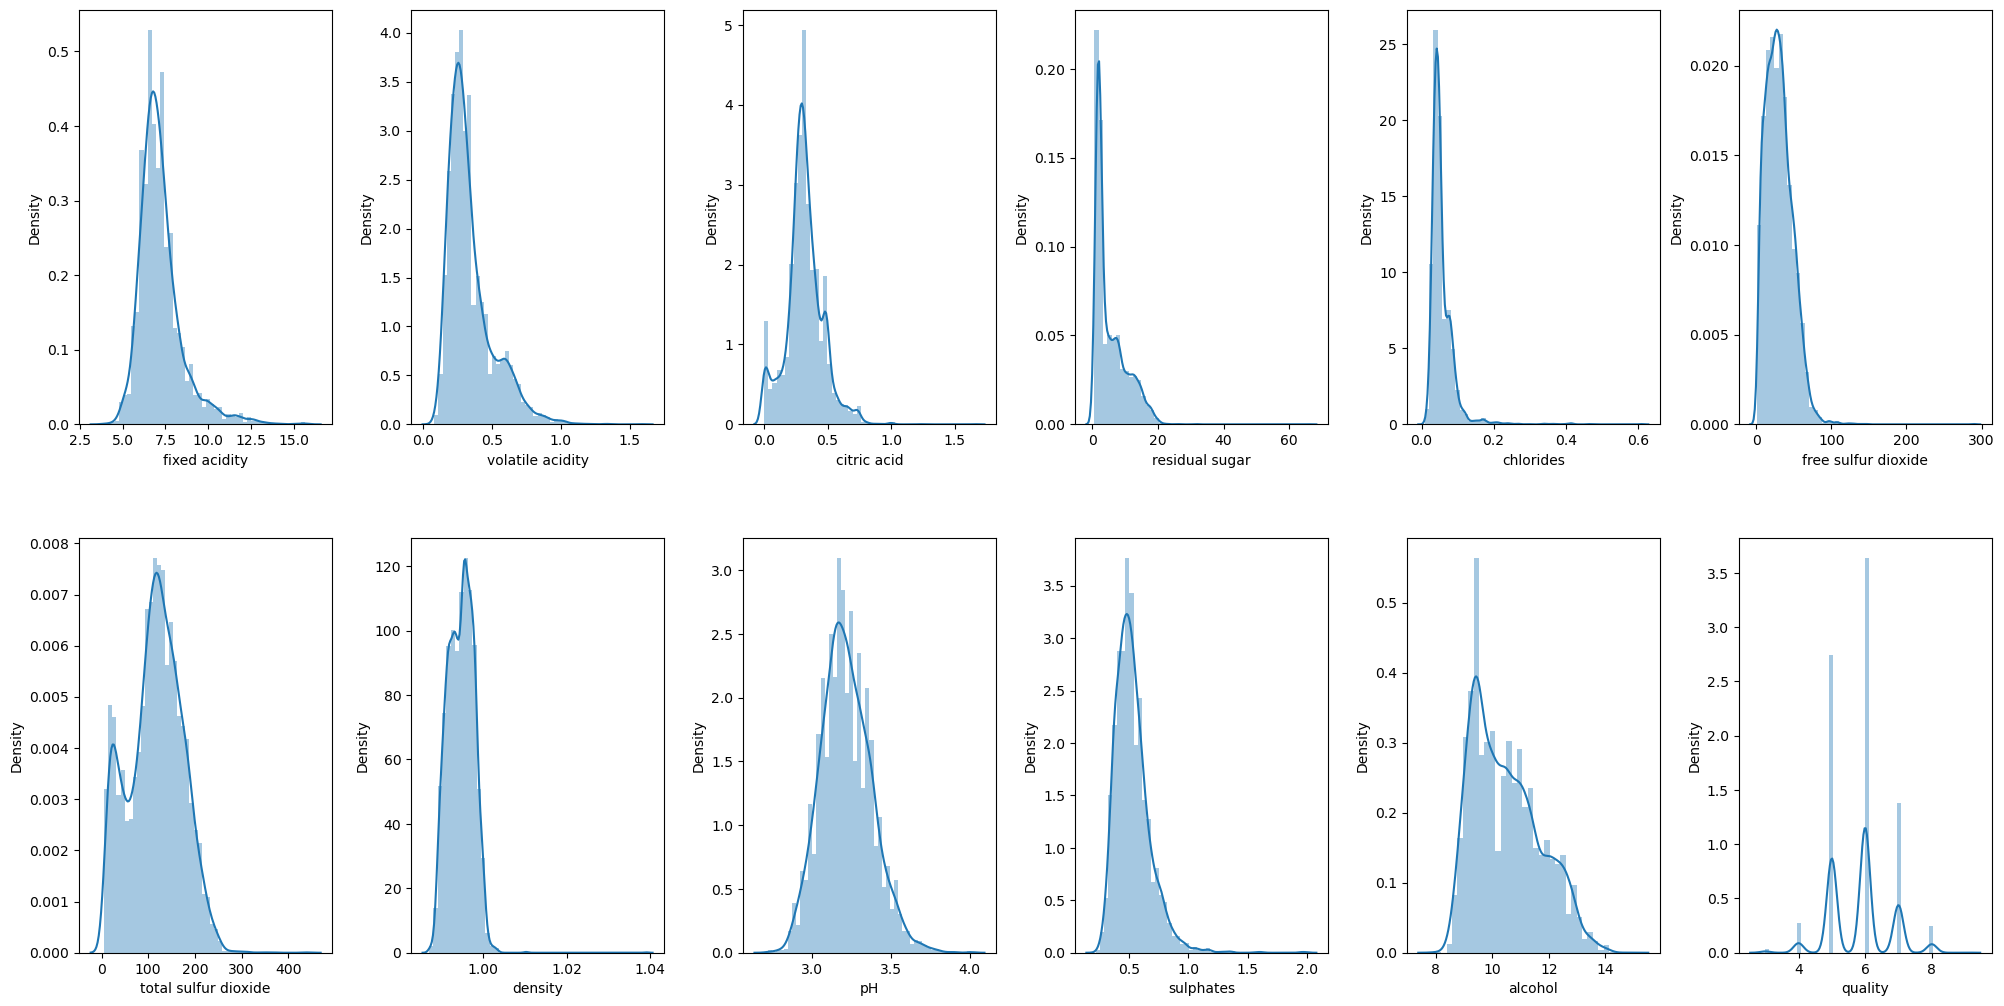

In [34]:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [35]:
# log transformation
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])

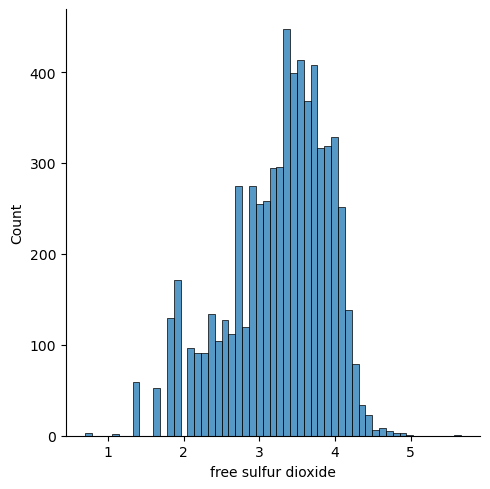

In [36]:
sns.displot (df['free sulfur dioxide'])

<Axes: xlabel='count', ylabel='type'>

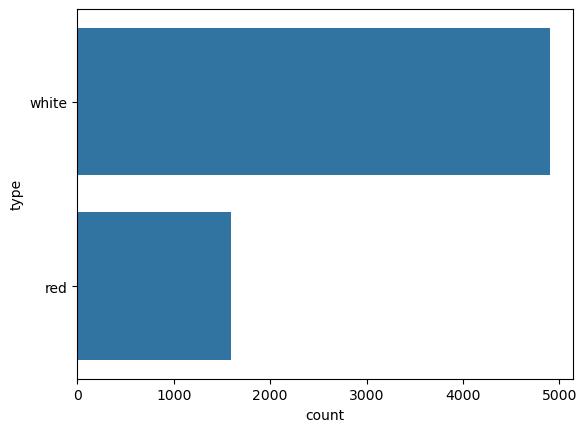

In [37]:
sns.countplot(df['type'])

<Axes: ylabel='count'>

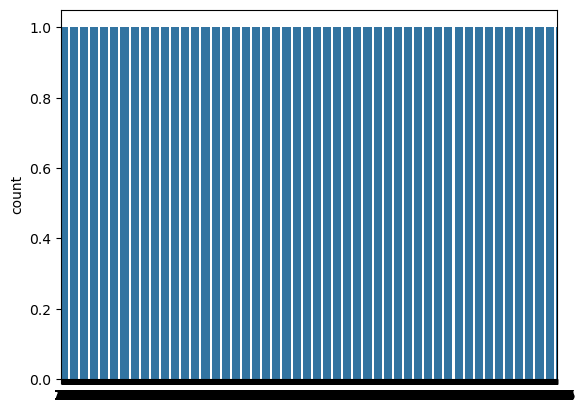

In [38]:
sns.countplot(df['quality'])

In [39]:
X = df.drop(['type', 'quality'],axis=1)
y = df['quality']

In [40]:
# classify function
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # train the model
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test) * 100)

In [41]:
from sklearn.tree import DecisionTreeClassifier
model = LinearRegression()
classify(model, X, y)

Accuracy: 31.751194275649


In [42]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy: 59.692307692307686


In [43]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
classify(model, X, y)

Accuracy: 59.50769230769231


In [44]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy: 69.78461538461539


In [45]:
# Remap the class labels in the target variable 'y'
y = y - y.min()

# Now you can proceed with your model training
import xgboost as xgb
model = xgb.XGBClassifier()
classify(model, X, y)

Accuracy: 64.8


In [46]:
from sklearn.model_selection import KFold, cross_val_score

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(RF, X, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Average CV Accuracy:", np.mean(scores))

Cross-validation scores: [0.69384615 0.67384615 0.70207852 0.68899153 0.66897614]
Average CV Accuracy: 0.6855476994137503
